load data
plot data

In [1]:
import numpy as np
import pickle
import pandas as pd
import time
from umap import UMAP

In [2]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [3]:
from tfumap.paths import FIGURE_DIR, save_fig

In [4]:
save_loc = DATA_DIR / 'projection_speeds' 

In [5]:
datasets = [
    'cassins_dtw',
    'cifar10',
    'fmnist',
    'macosko2015',
    'mnist'
]

In [6]:
projection_speeds = pd.concat([pd.read_pickle(save_loc / (dataset + '.pickle')) for dataset in datasets])
projection_speeds[:3]

,method_,dimensions,dataset,speed,nex
0,network,2,cassins_dtw,1.998637,1000
1,network,2,cassins_dtw,0.007758,1000
2,network,2,cassins_dtw,0.008960,1000


In [7]:
median_df = projection_speeds.groupby(['method_','dimensions', 'dataset']).median()
median_df = median_df.T.melt()
median_df

,method_,dimensions,dataset,value
0,TSNE,2,cassins_dtw,0.999941
1,TSNE,2,cifar10,11.810482
2,TSNE,2,fmnist,5.839541
3,TSNE,2,macosko2015,1.700318
4,TSNE,2,mnist,5.764574
5,network,2,cassins_dtw,0.007677
6,network,2,cifar10,0.137416
7,network,2,fmnist,0.016243
8,network,2,macosko2015,0.002191
9,network,2,mnist,0.016976


In [8]:
import seaborn as sns

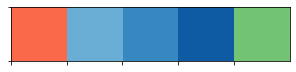

In [9]:
palette = sns.color_palette('Blues', 5)[2:] + sns.color_palette('Greens', 1) + sns.color_palette('Reds', 1)
palette = [palette[-1]] + palette[:-1]
sns.palplot(palette)

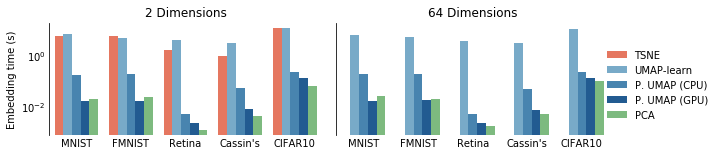

In [10]:
fg = sns.catplot(
    x="dataset",
    y="value",
    hue="method_",
    hue_order=["TSNE","umap-learn", "network-cpu", "network",  "pca"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dimensions",
    height=2.5, 
    aspect=1.75,
    data=median_df,
    kind="bar",
    palette=palette,
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Embedding time (s)")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network-cpu'))[0][0]].set_text('P. UMAP (CPU)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP (GPU)')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'pca'))[0][0]].set_text('PCA')
#fg._legend.texts[3].set_text("PCA")
#ax.set_ylim([1e-10,1e-3])
ax.set_yscale('log')
#fg._legend.texts[2].set_text("Param. UMAP")

ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')
#ax.set_yscale('log')

save_fig(FIGURE_DIR/'embedding_speed', save_pdf=True, dpi=300, pad_inches=0.1)

In [11]:
median_df = projection_speeds.groupby(['method_','dimensions', 'dataset']).median()
median_df.reset_index(inplace=True)  
median_df

,method_,dimensions,dataset,speed
0,TSNE,2,cassins_dtw,0.999941
1,TSNE,2,cifar10,11.810482
2,TSNE,2,fmnist,5.839541
3,TSNE,2,macosko2015,1.700318
4,TSNE,2,mnist,5.764574
5,network,2,cassins_dtw,0.007677
6,network,2,cifar10,0.137416
7,network,2,fmnist,0.016243
8,network,2,macosko2015,0.002191
9,network,2,mnist,0.016976


In [12]:
# 2 AMD EPYC Rome 7252 8-Core 3.1 GHz  processors 